In [1]:
from __future__ import division
%matplotlib inline
import numpy as np
from scipy.stats import norm, uniform, bernoulli
from scipy.linalg import sqrtm 
from pylab import plot, show, legend
import matplotlib.pyplot as plt
import math 
import scipy
from model_functions import propagate_Lorenz63, g, simulate_observations, bootstrap_PF
from resampling_functions import systematic_resampling 

### Plot two trajectories at different parameter values

* Same starting point.

* Driven by same noise.

* See how fast they diverge.

In [2]:
dt    = 10**-3 / 5
delta = 10*dt
T     = 1000
n     = 3

sigma, rho, beta, noise_intensity = 10, 28, 8/3, 0.1
theta = [ sigma, rho, beta, noise_intensity ]

#setup measurement process

space_between_observations = 1

observation_points = space_between_observations*(np.arange(0, int(n/space_between_observations)) + 1) - 1
m = len(observation_points)
H = np.zeros(( m, n ))
for i in range(m):
    H[ i, observation_points[i] ] = 1

sigma_error = 0.3    
R = sigma_error*np.diag(np.ones(m))

#generate latent process + observation
x_0 = np.loadtxt('x_0_e3.out'); y = np.loadtxt('y_e3.out'); latent = np.loadtxt('latent_e3.out')

### Plot log-likelihoods.


* Plot log-likelihoods around true parameter value.


* $\sigma_{\text{observation}} = 0.1$.


C:\Python34\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


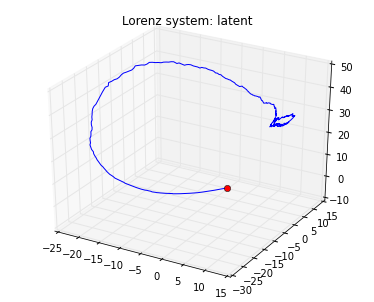

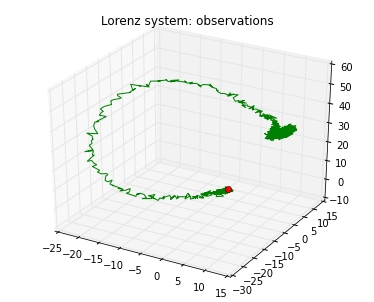

In [3]:
plt.rcParams['figure.figsize'] = (5.0, 4.0)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(latent[0,:], latent[1,:], latent[2,:])
ax.plot(latent[0,0:1], latent[1,0:1], latent[2,0:1], 'ro')
plt.title("Lorenz system: latent")

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(y[0,:], y[1,:], y[2,:], color='green')
ax.plot(y[0,0:1], y[1,0:1], y[2,0:1], 'ro')
plt.title("Lorenz system: observations")

### Plot likelihoods:

### $T = 1000$:

In [7]:
def loglikelihood(theta_grid, n_particles, x_0, y, dt, delta, g, H, R) :
    
    n_theta = np.shape(theta_grid)[1]
    
    log_likelihood = np.zeros(n_theta)
    for i in range(n_theta) :
        log_likelihood[i] = bootstrap_PF(n_particles, x_0, theta_grid[:,i], y, dt, delta, g, H, R)[0][-1] 
    
    return log_likelihood

In [5]:
n_particles = 2000
n_theta = 51
theta_grid = np.zeros(( len(theta), n_theta ))

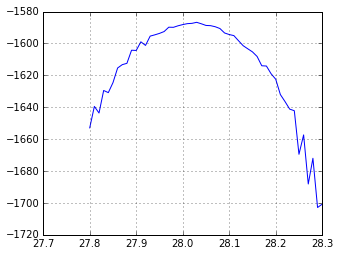

In [12]:
for i in range(n_theta) :
    theta_grid[:,i] = theta[:]
theta_grid[1,:] = np.linspace(theta[1]-0.2, theta[1]+0.3, n_theta)

log_likelihoods = loglikelihood(theta_grid, n_particles, x_0, y, dt, delta, g, H, R)

plt.rcParams['figure.figsize'] = (5.0, 4.0)

plt.plot(theta_grid[1,:], log_likelihoods)
plt.grid(True)
plt.show()

In [13]:
print (np.sqrt(-0.5/np.polyfit(theta_grid[1,:], log_likelihoods, 2)[0]))

0.0189270494076


In [16]:
1/18.9270494076

0.05283443702526915

### $T = 750$:

In [8]:
n_particles = 2000
n_theta = 51
theta_grid = np.zeros(( len(theta), n_theta ))

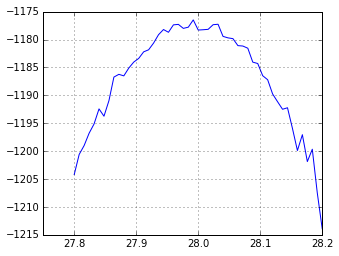

In [13]:
for i in range(n_theta) :
    theta_grid[:,i] = theta[:]
theta_grid[1,:] = np.linspace(theta[1]-0.2, theta[1]+0.2, n_theta)

log_likelihoods = loglikelihood(theta_grid, n_particles, x_0, y[:,:750], dt, delta, g, H, R)

plt.rcParams['figure.figsize'] = (5.0, 4.0)

plt.plot(theta_grid[1,:], log_likelihoods)
plt.grid(True)
plt.show()

In [14]:
print (np.sqrt(-0.5/np.polyfit(theta_grid[1,:], log_likelihoods, 2)[0]))

0.026287073142


In [15]:
15/26.287073142

0.57062267522031